## Alternative Vocabulary Options

Instead of using only tokens from "the-verdict.txt", you can use more comprehensive English vocabularies:

### Option 1: NLTK Words Corpus
```python
import nltk
nltk.download('words')
from nltk.corpus import words
english_words = set(words.words())
```

### Option 2: Pre-trained Tokenizers
- **tiktoken** (OpenAI's tokenizer) - already in requirements.txt
- **Hugging Face tokenizers** - BPE, WordPiece, SentencePiece
- **spaCy** tokenizers

### Option 3: Large Text Datasets
- Common Crawl
- Wikipedia dumps
- Project Gutenberg
- Google Books N-grams

### Option 4: Word Frequency Lists
- Google's 10,000 most common English words
- Brown Corpus vocabulary
- Oxford English Dictionary word lists

In [1]:
with open("./files/the-verdict.txt", "r", encoding="utf-8") as file:
    raw_text = file.read()

In [2]:
len(raw_text)

20479

**Tokeninzing text**

In [3]:
import re
text = "Hello world! This is a test."
result = re.split(r'(\s)', text)
result = re.split(r'(\s|[.,!])', text)
result = [token for token in result if token.strip()]
result

['Hello', 'world', '!', 'This', 'is', 'a', 'test', '.']

In [4]:
'''import nltk
nltk.download('words')
from nltk.corpus import words
english_words = set(words.words())'''

"import nltk\nnltk.download('words')\nfrom nltk.corpus import words\nenglish_words = set(words.words())"

In [5]:
result = re.split(r'(--|[,.;:?_!"()\'\s-])', raw_text)
result = [item.strip() for item in result if item.strip()]
result


['I',
 'HAD',
 'always',
 'thought',
 'Jack',
 'Gisburn',
 'rather',
 'a',
 'cheap',
 'genius',
 '--',
 'though',
 'a',
 'good',
 'fellow',
 'enough',
 '--',
 'so',
 'it',
 'was',
 'no',
 'great',
 'surprise',
 'to',
 'me',
 'to',
 'hear',
 'that',
 ',',
 'in',
 'the',
 'height',
 'of',
 'his',
 'glory',
 ',',
 'he',
 'had',
 'dropped',
 'his',
 'painting',
 ',',
 'married',
 'a',
 'rich',
 'widow',
 ',',
 'and',
 'established',
 'himself',
 'in',
 'a',
 'villa',
 'on',
 'the',
 'Riviera',
 '.',
 '(',
 'Though',
 'I',
 'rather',
 'thought',
 'it',
 'would',
 'have',
 'been',
 'Rome',
 'or',
 'Florence',
 '.',
 ')',
 '"',
 'The',
 'height',
 'of',
 'his',
 'glory',
 '"',
 '--',
 'that',
 'was',
 'what',
 'the',
 'women',
 'called',
 'it',
 '.',
 'I',
 'can',
 'hear',
 'Mrs',
 '.',
 'Gideon',
 'Thwing',
 '--',
 'his',
 'last',
 'Chicago',
 'sitter',
 '--',
 'deploring',
 'his',
 'unaccountable',
 'abdication',
 '.',
 '"',
 'Of',
 'course',
 'it',
 "'",
 's',
 'going',
 'to',
 'send',
 't

In [6]:
preprossed = result
len(preprossed)

4766

## **CONVERTING THE TOKENS INTO TOKEN IDs**

In [7]:
all_tokens = sorted(set(preprossed))
vocab_size = len(all_tokens)
vocab = {token: integer for integer, token in enumerate(all_tokens)}
inverse_vocab = {integer: token for token, integer in vocab.items()}
token_ids = [vocab[token] for token in preprossed]
len(vocab)

1140

In [8]:
class SimpleTokenizerV1:
    """
    A simple tokenizer to convert text to a sequence of integer IDs and back.
    """

    def __init__(self, vocab: dict):
        """
        Initializes the tokenizer with a vocabulary.

        Args:
            vocab (dict): A dictionary mapping strings (tokens) to integer IDs.
        """
        self.str_to_int = vocab
        self.int_to_str = {i: s for s, i in vocab.items()}

    def encode(self, text: str) -> list[int]:
        """
        Encodes a string of text into a list of integer IDs.

        Args:
            text (str): The input text to encode.

        Returns:
            list[int]: A list of integer IDs representing the text.
        """
        # Split the text into tokens based on punctuation, special characters, and whitespace
        preprocessed = re.split(r'(--|[,.?_!"()\'\s])', text)
        
        # Clean up the tokens by removing leading/trailing whitespace and empty strings
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        
        # Convert the tokens to their corresponding integer IDs
        ids = [self.str_to_int[s] for s in preprocessed]
        return ids

    def decode(self, ids: list[int]) -> str:
        """
        Decodes a list of integer IDs back into a string of text.

        Args:
            ids (list[int]): The list of integer IDs to decode.

        Returns:
            str: The decoded text.
        """
        # Convert the integer IDs back to their string tokens and join them with spaces
        text = " ".join([self.int_to_str[i] for i in ids])
        
        # Refine the spacing around punctuation for better readability
        # This removes the space before certain punctuation marks
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [9]:
tokenizer = SimpleTokenizerV1(vocab)

In [10]:
text = "the last, painted"
ids = tokenizer.encode(text)
ids

[998, 606, 5, 751]

In [11]:
value = tokenizer.decode(ids)
value

'the last, painted'

## Adding special context to tokens for unknown words

In [12]:
all_tokens.extend(['<|endoftext|>', '|unk|'])

In [13]:
vocab_size = len(all_tokens)
vocab = {token: integer for integer, token in enumerate(all_tokens)}
inverse_vocab = {integer: token for token, integer in vocab.items()}
token_ids = [vocab[token] for token in preprossed]

In [14]:
len(vocab)

1142

In [15]:
class SimpleTokenizerV2:
    """
    An improved tokenizer that handles unknown words with special tokens.
    """

    def __init__(self, vocab: dict):
        """
        Initializes the tokenizer with a vocabulary.

        Args:
            vocab (dict): A dictionary mapping strings (tokens) to integer IDs.
        """
        self.str_to_int = vocab
        self.int_to_str = {i: s for s, i in vocab.items()}
        self.unk_token = "|unk|"  # Unknown token
        self.unk_id = vocab.get(self.unk_token, None)
        
        if self.unk_token not in vocab:
            raise ValueError(f"Unknown token '{self.unk_token}' not found in vocabulary")

    def encode(self, text: str) -> list[int]:
        """
        Encodes a string of text into a list of integer IDs.
        Unknown tokens are replaced with |unk| token.

        Args:
            text (str): The input text to encode.

        Returns:
            list[int]: A list of integer IDs representing the text.
        """
        # Split the text into tokens based on punctuation, special characters, and whitespace
        preprocessed = re.split(r'(--|[,.?_!"()\'\s])', text)
        
        # Clean up the tokens by removing leading/trailing whitespace and empty strings
        preprocessed = [item.strip() for item in preprocessed if item.strip()]
        
        # Convert the tokens to their corresponding integer IDs
        # Use unk_id for unknown tokens
        ids = []
        for token in preprocessed:
            if token in self.str_to_int:
                ids.append(self.str_to_int[token])
            else:
                ids.append(self.unk_id)  # Use unknown token ID
                print(f"Unknown token '{token}' replaced with '{self.unk_token}'")
        
        return ids

    def decode(self, ids: list[int]) -> str:
        """
        Decodes a list of integer IDs back into a string of text.

        Args:
            ids (list[int]): The list of integer IDs to decode.

        Returns:
            str: The decoded text.
        """
        # Convert the integer IDs back to their string tokens and join them with spaces
        text = " ".join([self.int_to_str[i] for i in ids])
        
        # Refine the spacing around punctuation for better readability
        # This removes the space before certain punctuation marks
        text = re.sub(r'\s+([,.?!"()\'])', r'\1', text)
        return text

In [16]:
tokenizer2 = SimpleTokenizerV2(vocab)
text = "hii, painted"
ids = tokenizer2.encode(text)
ids

Unknown token 'hii' replaced with '|unk|'


Unknown token 'hii' replaced with '|unk|'


[1141, 5, 751]

## Byte pair encoding for unknown words (GPT-2)

In [17]:
import tiktoken

In [18]:
tokenizer = tiktoken.get_encoding("gpt2")
text = "Hello world! This is a test."
ids = tokenizer.encode(text)
ids

[15496, 995, 0, 770, 318, 257, 1332, 13]

## Data Sampling (Slinding window)

In [19]:
import torch
from torch.utils.data import Dataset, DataLoader

class GPTDatasetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []
        
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i : i + max_length]
            target_chunk = token_ids[i + 1 : i + max_length + 1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [20]:
def create_dataloader_v1(txt, batch_size=2, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):
    
    tokenizer = tiktoken.get_encoding("gpt2")

    dataset = GPTDatasetV1(txt, tokenizer, max_length, stride)

    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        drop_last=drop_last,
        num_workers=num_workers
    )

    return dataloader

In [25]:
data_loader = create_dataloader_v1(raw_text, batch_size=1, max_length=4, stride=4, shuffle=False)
data_loader


## Token IDs -> Token Embeddings

In [24]:
embedding_layer = torch.nn.Embedding(6, 2)

##  Encoding word position

In [27]:
embedding_layer = torch.nn.Embedding(50257, 256)
sample_batch = next(iter(data_loader))
input_ids, target_ids = sample_batch
token_embeddings = embedding_layer(input_ids)
print(f"Token embeddings shape: {token_embeddings.shape}")

Token embeddings shape: torch.Size([1, 4, 256])


In [28]:
vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

max_length = 4
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)
data_iter = iter(dataloader)
inputs, targets = next(data_iter)

In [29]:
token_embeddings = token_embedding_layer(inputs)
token_embeddings.shape

torch.Size([8, 4, 256])

adding positional information

In [32]:
context_length = max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)

torch.arange(max_length)

tensor([0, 1, 2, 3])

In [33]:
pos_embedding_layer.weight

Parameter containing:
tensor([[-0.0882,  0.8422, -0.1900,  ...,  0.3308,  1.1273, -0.5850],
        [-2.2515, -0.2265,  0.8153,  ..., -0.1192,  0.9164, -1.5032],
        [-0.9874, -0.0549,  1.1247,  ..., -0.9028,  1.6452, -1.6121],
        [-1.2688,  0.2812, -0.7250,  ...,  0.7938,  1.4585,  0.7849]],
       requires_grad=True)

In [35]:
pos_embedding = pos_embedding_layer(torch.arange(max_length))
token_embeddings.shape
input_embeddings = token_embeddings + pos_embedding
input_embeddings

tensor([[[ 0.1879,  1.5505,  1.4508,  ...,  0.0181,  0.2490, -0.7247],
         [-1.6031,  0.4306,  2.1332,  ...,  0.2283,  2.7367, -1.8855],
         [-2.4975,  0.1889,  1.6259,  ..., -0.8247,  2.3048, -1.8709],
         [-1.2407,  1.0132,  0.2476,  ...,  1.2262,  1.1266,  0.4753]],

        [[ 0.2672,  0.6528, -0.4702,  ...,  1.0625,  1.1461, -1.7359],
         [ 0.1705,  0.6709,  0.5932,  ..., -0.0230,  3.5569, -0.5557],
         [-1.4279,  1.2836,  1.2024,  ..., -0.5989,  1.6410, -2.7031],
         [-0.5465, -0.6491, -0.0436,  ...,  1.5701,  0.3883,  0.2506]],

        [[-1.5198,  1.7940,  0.2928,  ...,  2.5478,  1.5441,  0.7969],
         [-3.1444,  0.5730,  1.5750,  ...,  0.5923,  1.7345, -1.0223],
         [-0.2617, -0.6974,  0.4352,  ..., -1.3193,  2.1155, -1.2549],
         [-0.2747,  0.3835, -2.1807,  ...,  0.5485, -0.2894,  0.2769]],

        ...,

        [[-1.8697,  0.0685, -2.0448,  ..., -0.1349,  0.4763, -1.1620],
         [-1.8411,  0.4762,  0.4682,  ...,  0.8928,  1.09

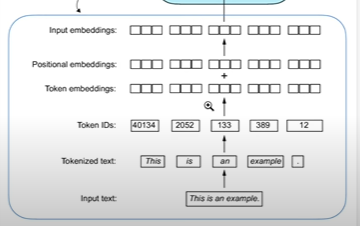